# 1 - Introduction

Wine quality assessment is a crucial aspect of the wine industry, influencing production, pricing, and consumer satisfaction. This dataset, sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality), contains physicochemical properties of red and white wine samples from the **Vinho Verde** region of Portugal. Each sample is labeled with a **quality score** ranging from 0 to 10, based on sensory evaluations from wine experts.

The objective of this study is to develop a machine learning model capable of predicting **wine quality** based on its **chemical composition**. By analyzing factors such as **acidity, alcohol content, pH, and residual sugar**, we aim to uncover patterns that distinguish high-quality wines from lower-quality ones.

This project will involve **data preprocessing, exploratory data analysis (EDA), feature engineering, and model selection** to build a predictive system that can assist winemakers in optimizing production processes and maintaining high-quality standards.

## 1.1 - Explanation of Variables  

The dataset consists of **physicochemical properties** of wine samples and a **quality score** assigned by wine experts. Below is a description of each variable:  

### **Features (Independent Variables)**  
These continuous variables represent the chemical composition of the wine:  

- **fixed_acidity**: The amount of non-volatile acids present in the wine, primarily **tartaric acid**. It contributes to the wine’s tartness.  
- **volatile_acidity**: The concentration of volatile acids, mainly **acetic acid**, which can give wine an unpleasant vinegar taste if too high.  
- **citric_acid**: A naturally occurring acid in grapes that can add freshness and enhance the wine’s **flavor profile**.  
- **residual_sugar**: The remaining **sugar** after fermentation, measured in grams per liter. Affects the wine’s **sweetness**.  
- **chlorides**: The amount of **salt** in the wine, which can influence taste and preservation.  
- **free_sulfur_dioxide**: The **unbound SO₂** that acts as an antimicrobial and antioxidant in wine.  
- **total_sulfur_dioxide**: The total amount of **free and bound SO₂**, used as a preservative to prevent oxidation and bacterial growth.  
- **density**: The **mass per unit volume** of the wine, influenced by **alcohol, sugar, and dissolved substances**.  
- **pH**: Measures the **acidity** of the wine on a scale from **0 to 14**, where lower values indicate higher acidity.  
- **sulphates**: A form of **sulfur** that contributes to **wine stability** and acts as an antimicrobial agent.  
- **alcohol**: The **ethanol content** of the wine, which significantly impacts its **body, taste, and perception of quality**.  

### **Target Variable (Dependent Variable)**  
- **quality**: The **expert-assigned score** for each wine, ranging from **0 to 10**. A higher score indicates better wine quality.  

### **Other Variable**  
- **color**: A **categorical variable** indicating whether the wine is **red or white**.  

Each of these variables plays a role in defining wine characteristics, and understanding their interactions can help build a robust predictive model for wine quality.


In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')  # Set the plot style
palette = sns.color_palette(palette="pastel")
sns.set_palette("pastel")

import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, kruskal, rankdata, norm
import scipy.stats as stats
from scipy.spatial.distance import pdist, squareform

#Model
from sklearn.model_selection import train_test_split

# 2.1 Preparing the data

In [2]:
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [3]:
# variable information 
print(wine_quality.variables) 

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [4]:
df_wine = wine_quality.data.original

In [5]:
df_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

## 2.2 Checking for data quality

In [6]:
#Null values
df_wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [7]:
#Duplicated values
duplicated = df_wine[df_wine.duplicated(keep = False)]
print(duplicated.shape)

(2169, 13)


In [8]:
duplicated.head(15)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4             0.700         0.00            1.90      0.076   
4             7.4             0.700         0.00            1.90      0.076   
9             7.5             0.500         0.36            6.10      0.071   
11            7.5             0.500         0.36            6.10      0.071   
22            7.9             0.430         0.21            1.60      0.106   
27            7.9             0.430         0.21            1.60      0.106   
39            7.3             0.450         0.36            5.90      0.074   
40            7.3             0.450         0.36            5.90      0.074   
64            7.2             0.725         0.05            4.65      0.086   
65            7.2             0.725         0.05            4.65      0.086   
75            8.8             0.410         0.64            2.20      0.093   
76            8.8             0.410         0.64            2.20      0.093   
86            8.6             0.490         0.28            1.90      0.110   
87            7.7             0.490         0.26            1.90      0.062   
91            8.6             0.490         0.28            1.90      0.110   

    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
4                  11.0                  34.0   0.9978  3.51       0.56   
9                  17.0                 102.0   0.9978  3.35       0.80   
11                 17.0                 102.0   0.9978  3.35       0.80   
22                 10.0                  37.0   0.9966  3.17       0.91   
27                 10.0                  37.0   0.9966  3.17       0.91   
39                 12.0                  87.0   0.9978  3.33       0.83   
40                 12.0                  87.0   0.9978  3.33       0.83   
64                  4.0                  11.0   0.9962  3.41       0.39   
65                  4.0                  11.0   0.9962  3.41       0.39   
75                  9.0                  42.0   0.9986  3.54       0.66   
76                  9.0                  42.0   0.9986  3.54       0.66   
86                 20.0                 136.0   0.9972  2.93       1.95   
87                  9.0                  31.0   0.9966  3.39       0.64   
91                 20.0                 136.0   0.9972  2.93       1.95   

    alcohol  quality color  
0       9.4        5   red  
4       9.4        5   red  
9      10.5        5   red  
11     10.5        5   red  
22      9.5        5   red  
27      9.5        5   red  
39     10.5        5   red  
40     10.5        5   red  
64     10.9        5   red  
65     10.9        5   red  
75     10.5        5   red  
76     10.5        5   red  
86      9.9        6   red  
87      9.6        5   red  
91      9.9        6   red

In [9]:
df_wine_clean_all = df_wine.drop_duplicates(keep = 'first')
print(df_wine_clean_all.shape)

(5320, 13)


## Data Splitting for Training, Validation, and Testing

To ensure that our model is trained and evaluated properly, it's crucial to split the dataset into three distinct subsets: **training**, **validation**, and **test**. This is important to prevent **data leakage**, which can occur if the model has access to the test data during the training process, leading to overly optimistic performance estimates.

For our analysis, we will use the following split:
- **70% of the data** for training the model
- **20% of the data** for validating the model during training (to tune hyperparameters)
- **10% of the data** for final testing, ensuring an unbiased evaluation of the model's performance after training.

By keeping these datasets separate, we can avoid bias and ensure a more robust evaluation of the model's generalizability to new, unseen data.

In [10]:
# Separate the features (X) and target variable (y)
X = df_wine_clean_all.drop('quality', axis=1)  # Assuming 'quality' is the target
y = df_wine_clean_all['quality']

# First, split the data into training (80%) and temporary data (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the temporary data into validation (14%) and test (6.66%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Display the sizes of the resulting sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_valid.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 4256
Validation set size: 709
Test set size: 355


In [11]:
df_wine_clean = pd.concat([X_train.copy(), y_train], axis=1).reset_index(drop = True)

In [12]:
df_wine_clean.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0             0.170         0.74           12.80      0.045   
1           10.2             0.290         0.49            2.60      0.059   
2            6.6             0.705         0.07            1.60      0.076   
3            6.0             0.280         0.22           12.15      0.048   
4            7.7             0.380         0.23           10.80      0.030   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                  5.0                  13.0  0.99760  3.05       0.74   
2                  6.0                  15.0  0.99620  3.44       0.58   
3                 42.0                 163.0  0.99570  3.20       0.46   
4                 28.0                  95.0  0.99164  2.93       0.41   

   alcohol  color  quality  
0     12.2  white        8  
1     10.5    red        7  
2     10.7    red        5  
3     10.1  white        5  
4     13.6  white        6

## 2.3 Data distribution

In [13]:
df_wine_clean.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4256.000000        4256.00000  4256.000000     4256.000000   
mean        7.201868           0.34347     0.317646        5.066236   
std         1.320787           0.16720     0.147643        4.527248   
min         3.800000           0.08000     0.000000        0.600000   
25%         6.400000           0.23000     0.240000        1.800000   
50%         6.900000           0.30000     0.310000        2.800000   
75%         7.700000           0.41000     0.400000        7.500000   
max        15.900000           1.58000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4256.000000          4256.000000           4256.000000  4256.000000   
mean      0.055854            30.233788            114.769619     0.994514   
std       0.033466            18.080720             56.879099     0.002995   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             75.000000     0.992158   
50%       0.047000            28.000000            117.000000     0.994600   
75%       0.066000            41.000000            155.000000     0.996742   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4256.000000  4256.000000  4256.000000  4256.000000  
mean      3.224678     0.530406    10.553018     5.789944  
std       0.161994     0.144111     1.190380     0.882818  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     1.980000    14.900000     9.000000

In the next figure, we will check the data distribution and we will do a hypothesis test to see if the data is normally distributed with the Shapiri-Wilk test. The **Shapiro-Wilk test** is a statistical test used to assess whether a given sample comes from a normally distributed population. It is widely used for testing the normality of data, especially when dealing with small to moderate sample sizes.

#### Hypotheses: 
  $$ H_0: \text{The data is normally distributed} $$
  $$ H_1: \text{The data is not normally distributed} $$

In this analysis, we will use the Shapiro-Wilk test to evaluate if any of our numerical variables follow a normal distribution. If the p-value is greater than 0.05, we will assume the distribution is normal; otherwise, we will assume the distribution deviates from


In [14]:
def plot_hist_box(df, col, style="darkgrid"):
    """
    Plots a histogram and a boxplot for a given column, sharing the x-axis, 
    and annotates the Shapiro-Wilk test result for normality.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        col (str): Column name for the histogram and boxplot.
        style (str): Seaborn style (default: "darkgrid").
    """
    # Set the plot style
    sns.set_style(style)  
    
    # Perform the Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(df[col])
    normality_test_result = "Normally Distributed" if p_value > 0.05 else "Not Normally Distributed"
    
    # Calculate mean and median
    mean_val = df[col].mean()
    median_val = df[col].median()

    # Create figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True, gridspec_kw={'height_ratios': [1, 5]})

    # Boxplot with mean marker
    sns.boxplot(data=df, x=col, ax=axes[0], orient="h", showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": 'blue', "markeredgecolor": "black", "markersize": 7})

    # Histogram with mean and median lines
    sns.histplot(df[col], kde=True, ax=axes[1], color='skyblue')
    axes[1].axvline(mean_val, color='red', linestyle="--", linewidth=2, label="Mean")
    axes[1].axvline(median_val, color='green', linestyle="-.", linewidth=2, label="Median")

    # Annotate the Shapiro-Wilk test result
    axes[1].annotate(f"Shapiro-Wilk p-value: {p_value:.3e}\n{normality_test_result}",
                     xy=(0.7, 0.85), xycoords="axes fraction", fontsize=12, color="black", weight="bold", 
                     horizontalalignment='center', verticalalignment='center')

    # General title
    fig.suptitle(f"Distribution of {col}", fontsize=14, fontweight="bold")

    # Shared legend with colors matching the plot
    handles = [
        plt.Line2D([0], [0], color='red', linestyle="--", linewidth=2, label="Mean"),
        plt.Line2D([0], [0], color='green', linestyle="-.", linewidth=2, label="Median")
    ]
    fig.legend(handles=handles, loc="upper right", fontsize=10)

    # Adjust layout
    plt.tight_layout()
    plt.show()

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


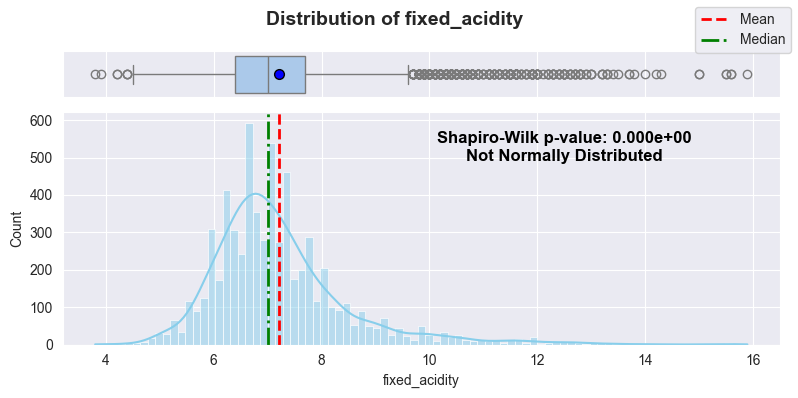

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


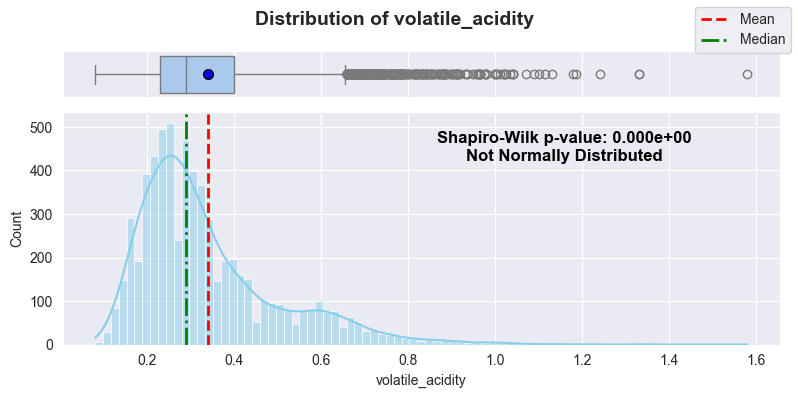

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


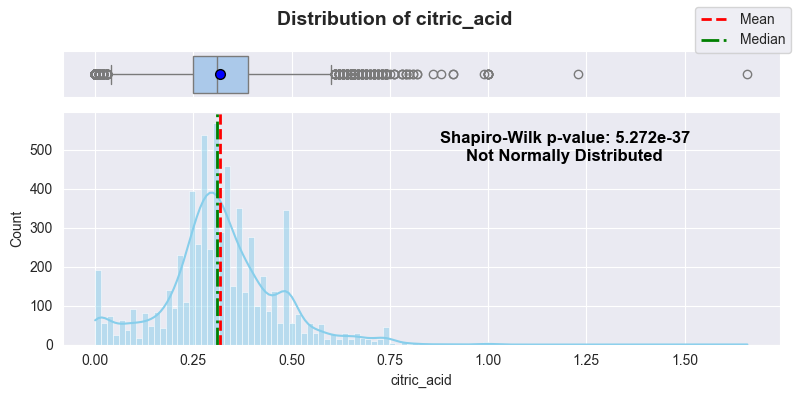

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


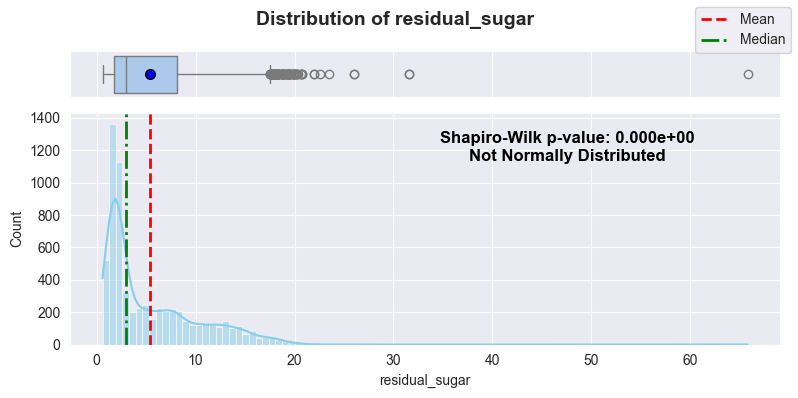

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


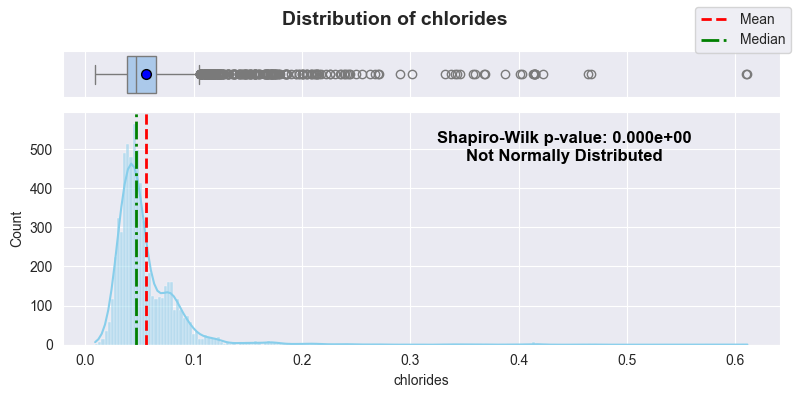

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


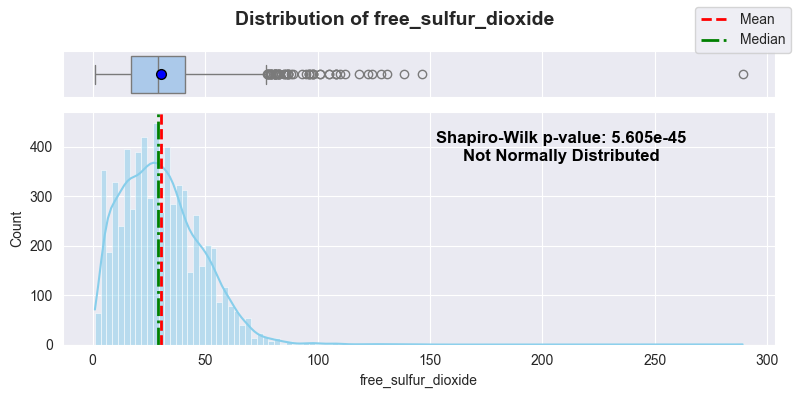

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


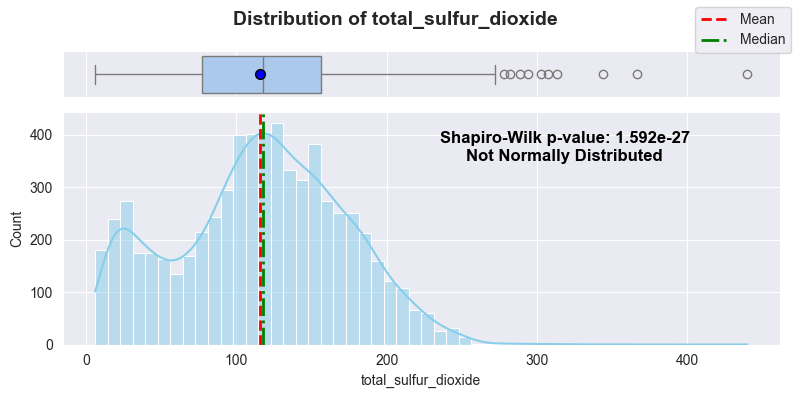

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


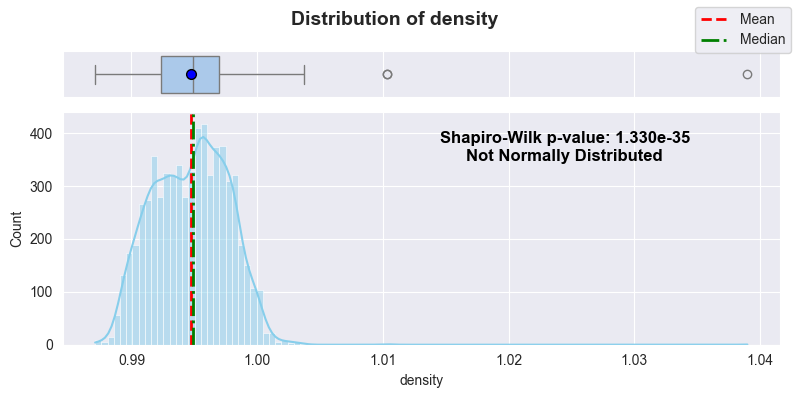

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


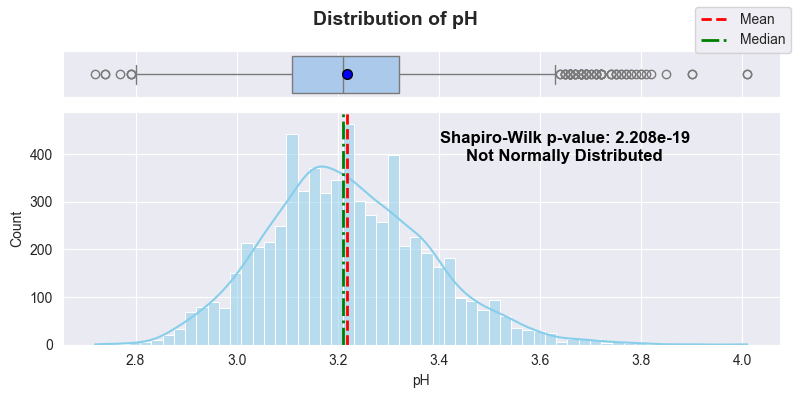

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


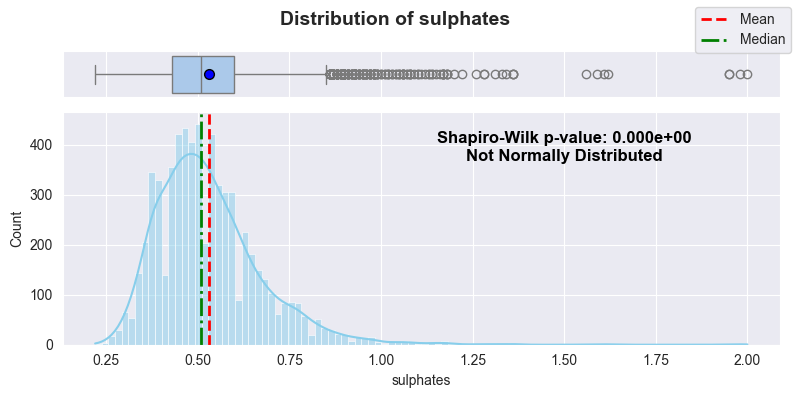

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


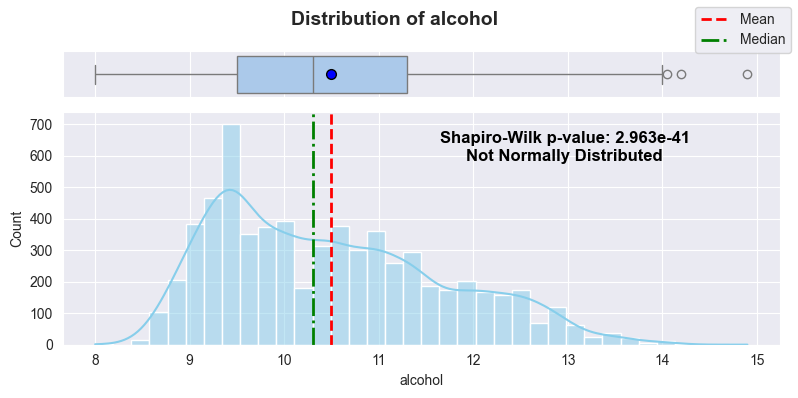

C:\Users\giode\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


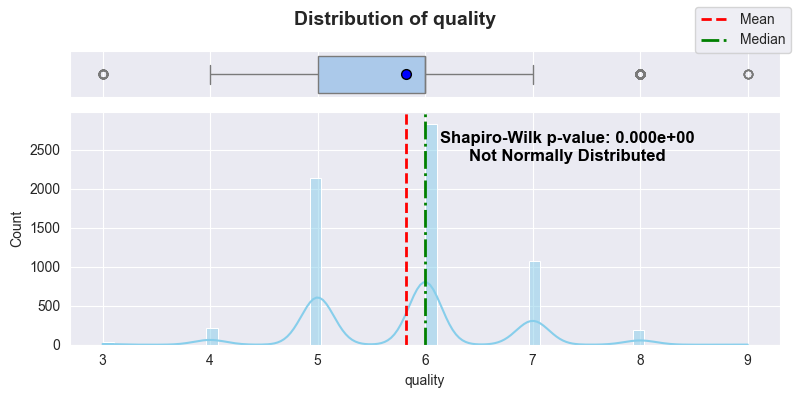

In [15]:
for col in df_wine_clean.select_dtypes(include=['number']).columns:
    plot_hist_box(df_wine, col)

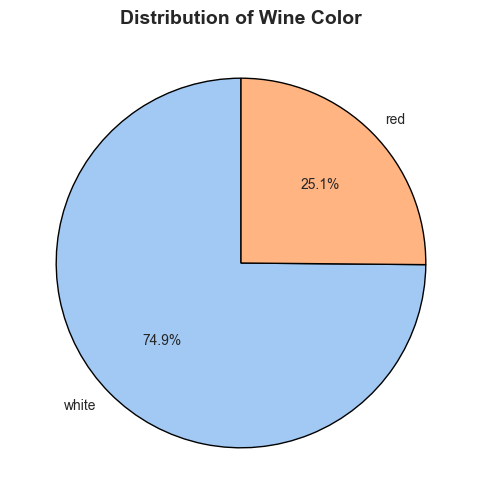

In [16]:
#sns.set_style('darkgrid')

# Get value counts
counts = df_wine_clean['color'].value_counts()

# Get Seaborn colors
colors = sns.color_palette("pastel", len(counts))

# Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})

# Title
plt.title(f"Distribution of Wine Color", fontsize=14, fontweight="bold")

plt.show()

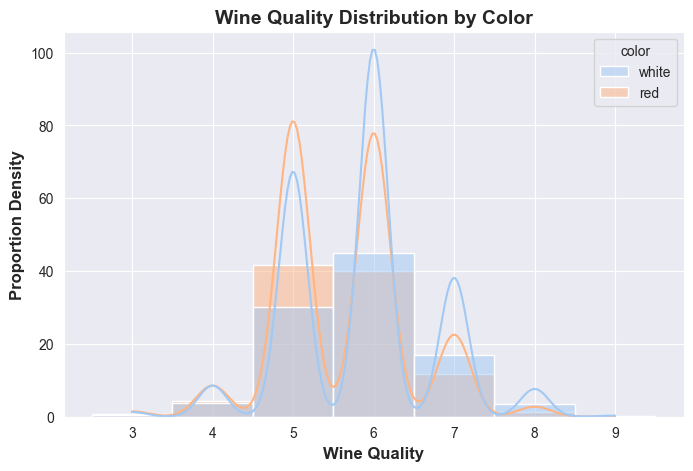

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_wine_clean, x='quality', hue='color', kde=True, stat="percent", discrete=True, 
             common_norm=False, multiple="layer", palette="pastel", ax=ax)

# Labels and title
ax.set_xlabel("Wine Quality", fontsize=12, fontweight="bold")
ax.set_ylabel("Proportion Density", fontsize=12, fontweight="bold")
ax.set_title("Wine Quality Distribution by Color", fontsize=14, fontweight="bold")
plt.show()

In [18]:
df_wine_clean[['quality','color']].groupby(['quality','color']).size().reset_index()

quality  color     0
0         3    red     8
1         3  white    18
2         4    red    47
3         4  white   121
4         5    red   447
5         5  white   957
6         6    red   429
7         6  white  1436
8         7    red   124
9         7  white   542
10        8    red    15
11        8  white   108
12        9  white     4

## 2.4 Outliers

In [19]:
# Lets reset the index
df_wine_clean.reset_index(inplace = True, drop = True) 

In [20]:
def index_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outlier_index = df[(df[column]< lower_bound) | (df[column]> upper_bound)].index
    print(f"Number of outliers for column {column}: {len(outlier_index)} ({len(outlier_index)/len(df)*100:.2f}%)")

    # Create the cumulative histplot
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False, cumulative=True, color='skyblue', stat="density", bins=30)
    
    # Add horizontal lines for the 95% and 99% percentiles
    percentile_95 = df[column].quantile(0.95)
    percentile_99 = df[column].quantile(0.99)
    plt.axvline(percentile_95, color='green', linestyle='--', label=f'95% percentile ({percentile_95:.2f})')
    plt.axvline(percentile_99, color='red', linestyle='--', label=f'99% percentile ({percentile_99:.2f})')
    
    # Add lines for the outlier bounds
    plt.axvline(lower_bound, color='orange', linestyle='--', label=f'Lower bound ({lower_bound:.2f})')
    plt.axvline(upper_bound, color='orange', linestyle='--', label=f'Upper bound ({upper_bound:.2f})')

    # Labels and title
    plt.title(f'Cumulative Histogram of {column} with Outlier Bounds')
    plt.xlabel(column)
    plt.ylabel('Cumulative Density')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()
    
    return outlier_index

Number of outliers for column fixed_acidity: 238 (5.59%)


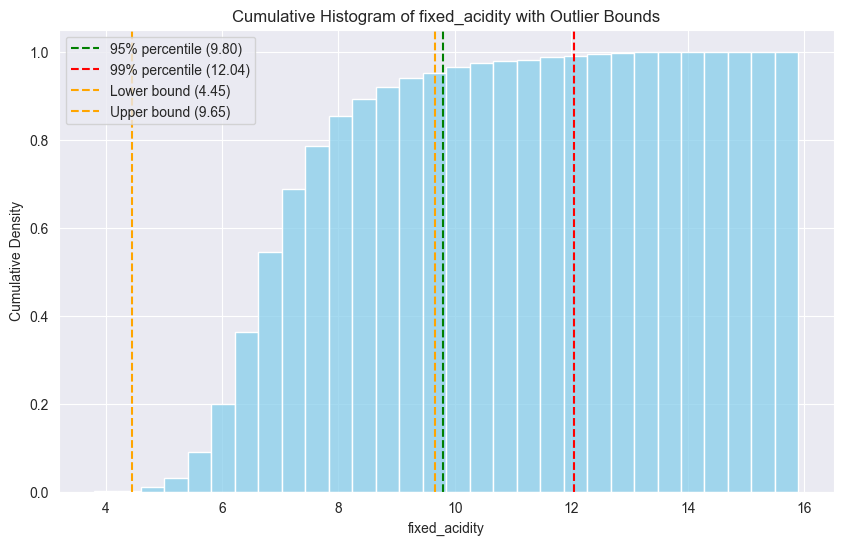

Number of outliers for column volatile_acidity: 223 (5.24%)


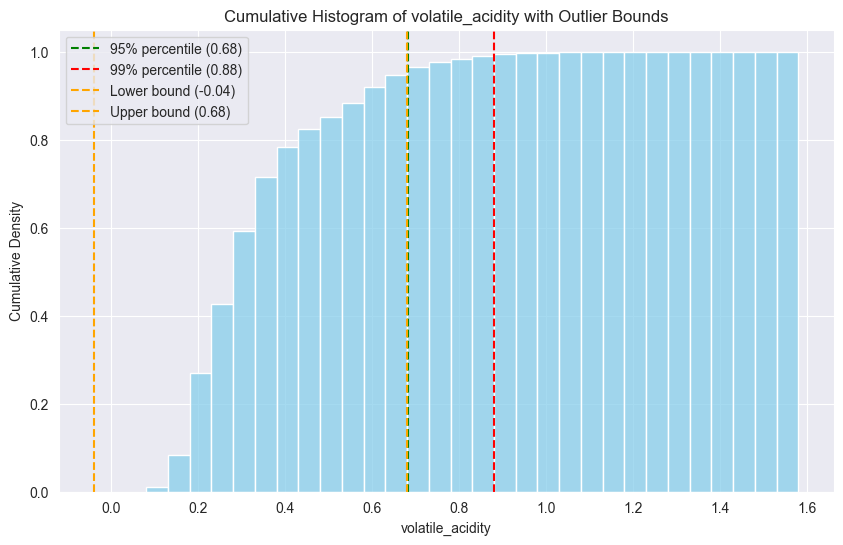

Number of outliers for column citric_acid: 115 (2.70%)


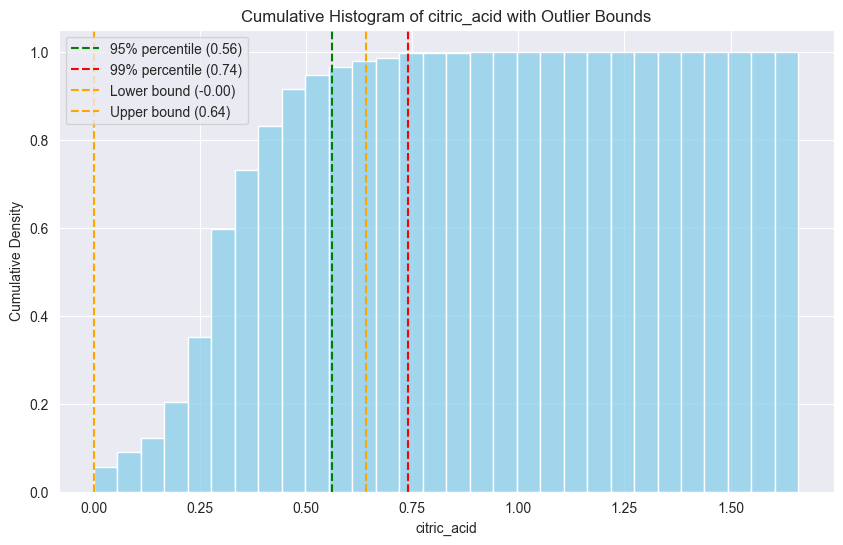

Number of outliers for column residual_sugar: 116 (2.73%)


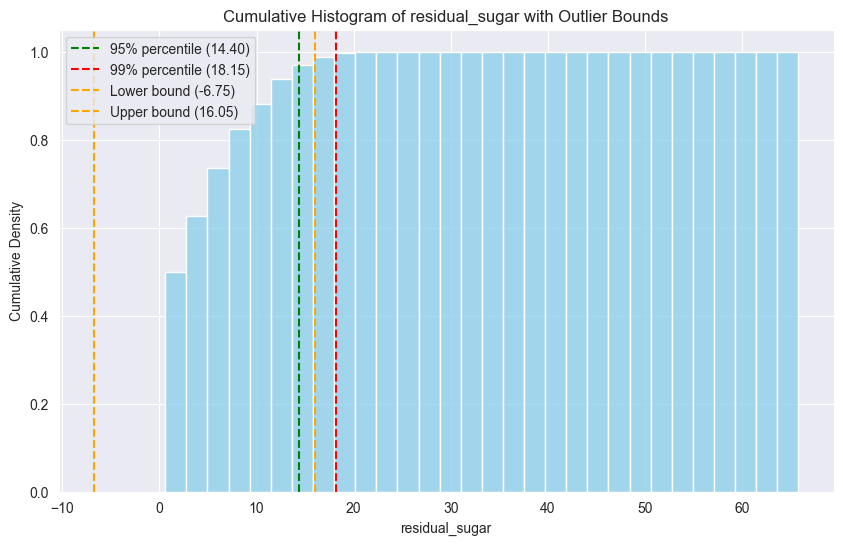

Number of outliers for column chlorides: 179 (4.21%)


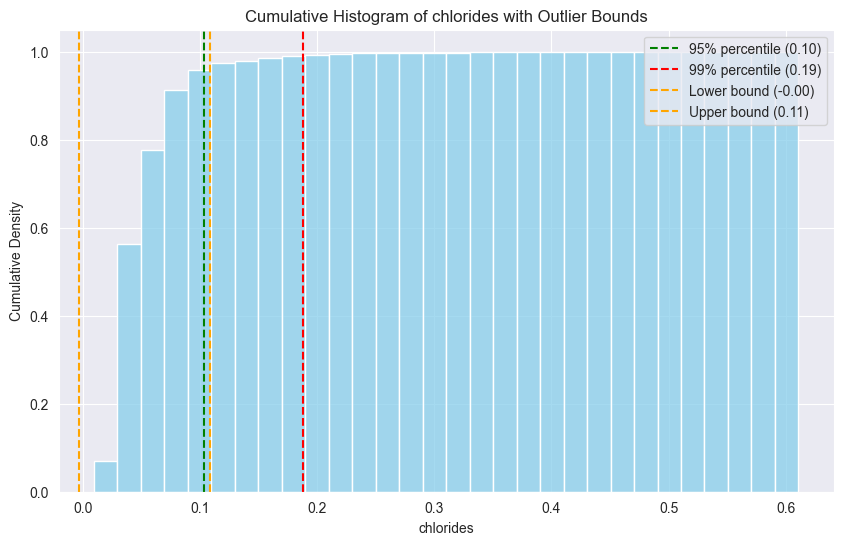

Number of outliers for column free_sulfur_dioxide: 38 (0.89%)


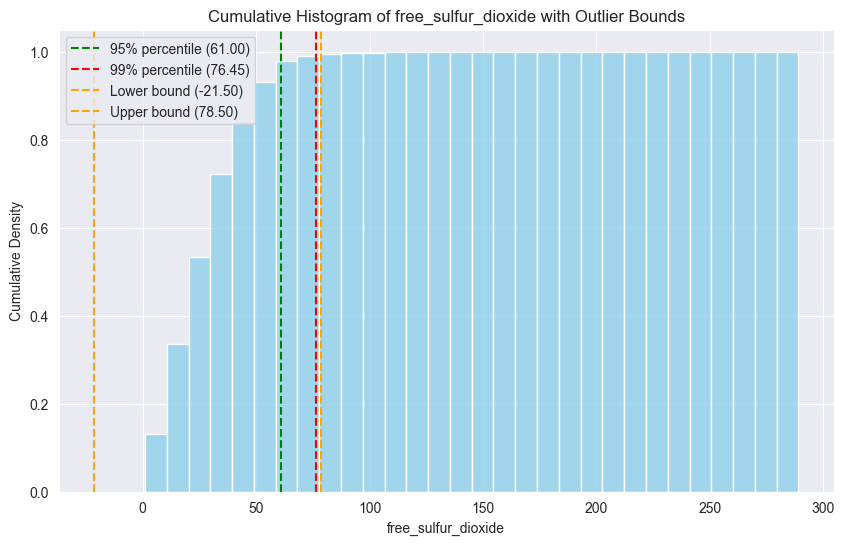

Number of outliers for column total_sulfur_dioxide: 7 (0.16%)


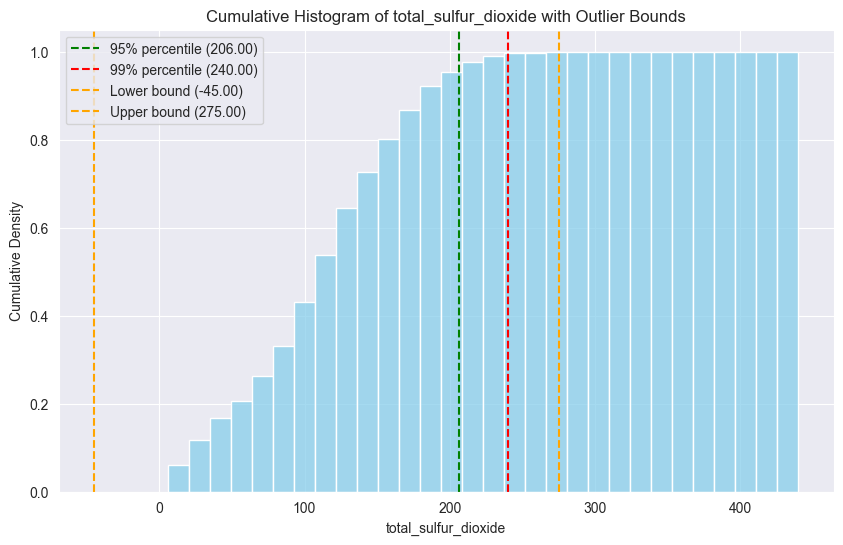

Number of outliers for column density: 3 (0.07%)


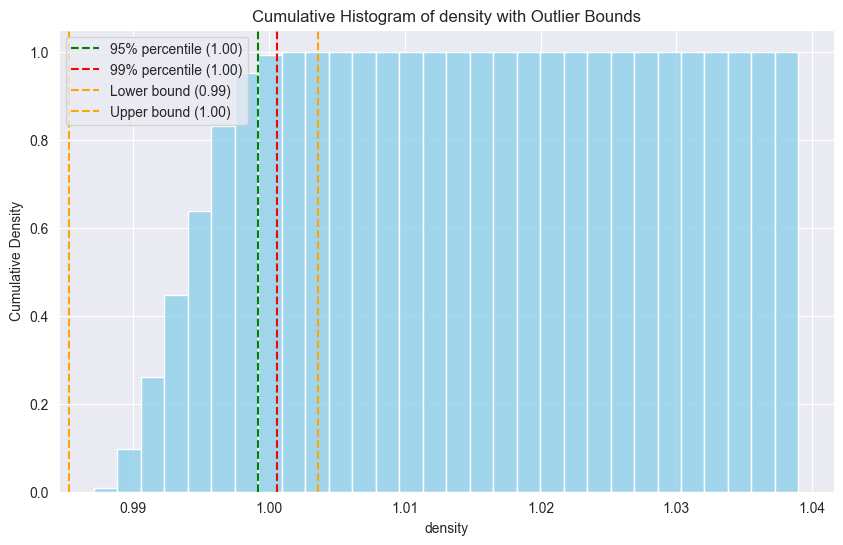

Number of outliers for column pH: 45 (1.06%)


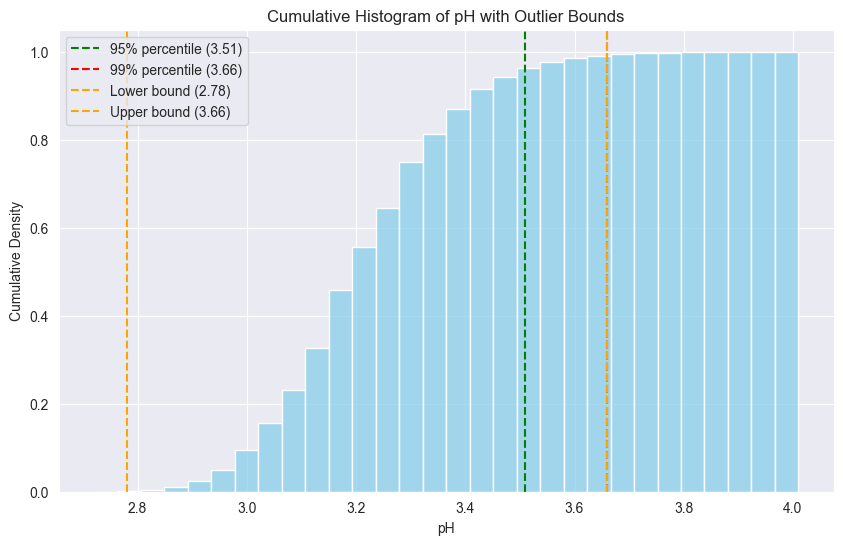

Number of outliers for column sulphates: 118 (2.77%)


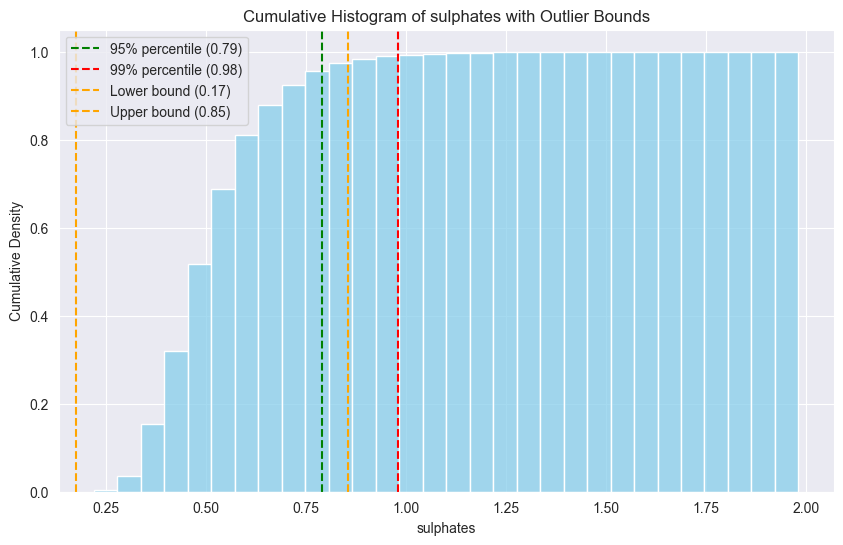

Number of outliers for column alcohol: 1 (0.02%)


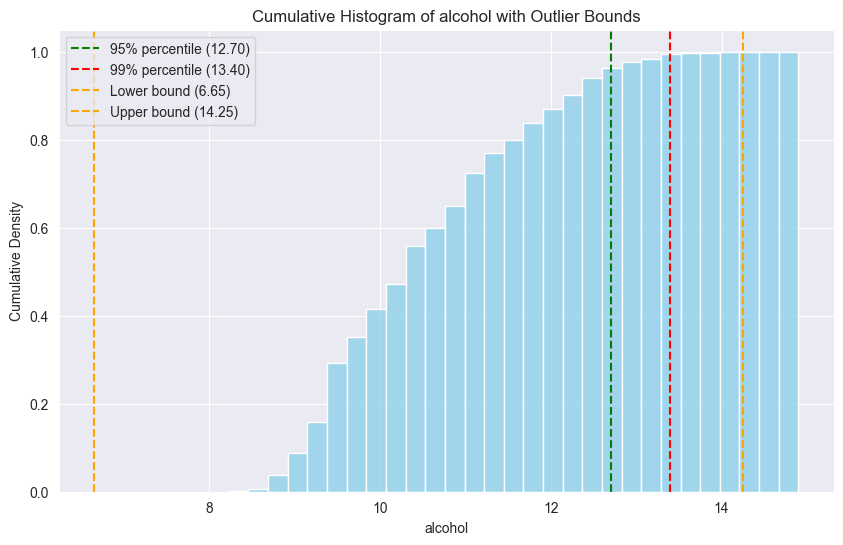

Number of outliers for column quality: 153 (3.59%)


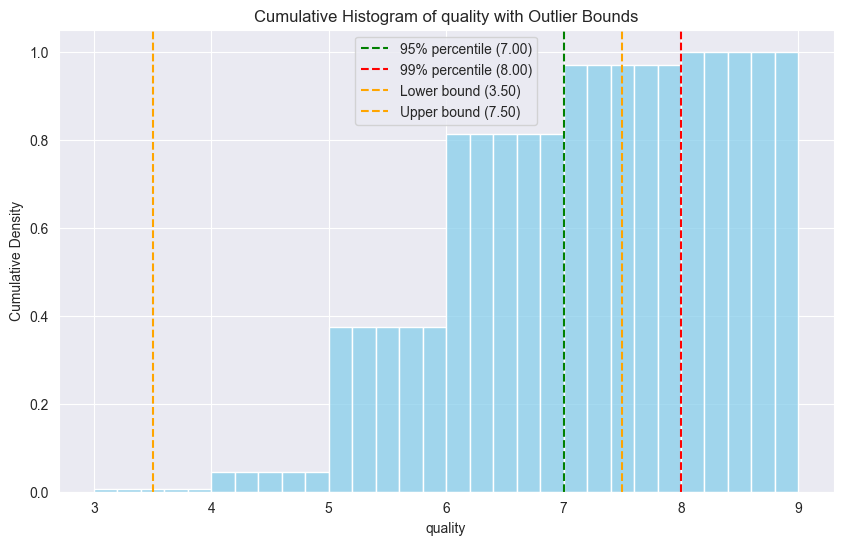

In [21]:
outliers_index = {}
for col in df_wine_clean.select_dtypes(include=['number']).columns:
    outliers_index[col] = index_outliers(df_wine_clean, col)

### **Highlights:**  
- The vast majority of wines have a quality rating between **5 and 7**.  
- **White wines** tend to have **higher quality ratings** compared to red wines.  
- The dataset consists of **75% white wines and 25% red wines**.  
- Very few wines have **extremely high or extremely low quality ratings**.  
- **Boxplots and cumulative histograms suggest the presence of outliers** in many variables, though the values do not seem unreasonable. **We need to evaluate the impact on the model performance later**
- The dataset originally contained **2,139 duplicate rows**, which were removed.  
- **No missing values** were found.  

### **Next Steps:**    
- Investigate how the wine color impacts other variables. Is it worth separating?  
- Analyze the relationships between variables (bivariate analysis).  
- Identify which variables have the strongest correlation with the target.

# 3 - Exploratory data analysis

In [22]:
# Create quality category

df_wine_clean['quality_categorical'] = df_wine_clean['quality'].apply(lambda x: 'Good' if x>=7 else ('Medium' if x>=5 else 'Bad'))


quality_order = ["Bad", "Medium", "Good"]

# Convert to an ordered categorical variable
df_wine_clean["quality_categorical"] = pd.Categorical(
    df_wine_clean["quality_categorical"], 
    categories=quality_order, 
    ordered=True
)

In [23]:
numerical_columns = df_wine_clean.select_dtypes(include=['number']).columns
categorical_columns = df_wine_clean.select_dtypes(exclude=['number']).columns

In [24]:
df_wine_clean['quality_categorical'].value_counts()

quality_categorical
Medium    3269
Good       793
Bad        194
Name: count, dtype: int64

## 3.1 - Color of wine

### 3.1.2 - Wine color impacts on quality categorical

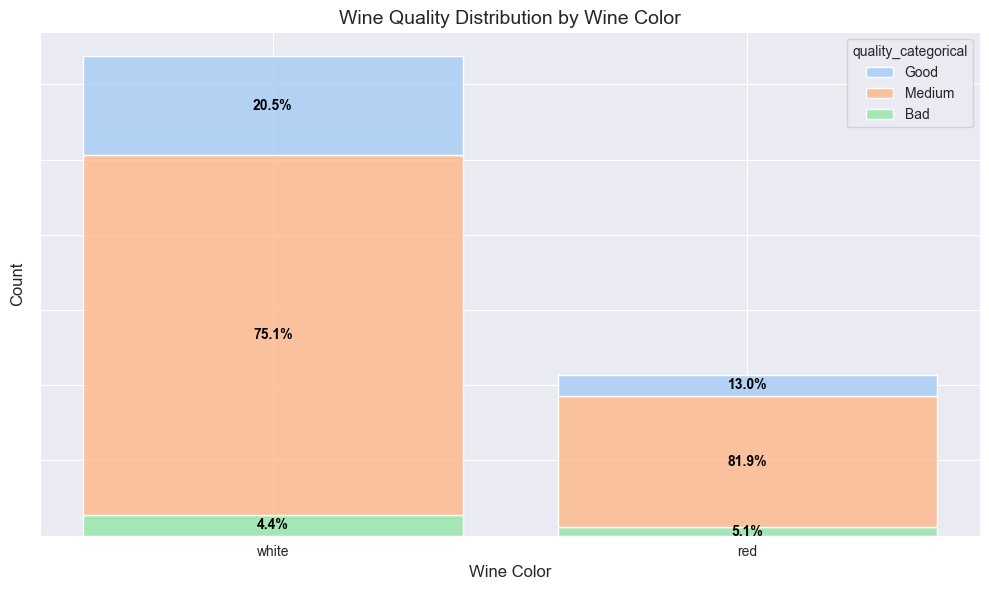

In [25]:
# Define the order for wine quality categories
quality_order = ['Good', 'Medium', 'Bad']

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_wine_clean, x='color', hue='quality_categorical', multiple='stack', discrete=True, 
                  hue_order=quality_order, shrink=0.8)

# Add title and labels
plt.title('Wine Quality Distribution by Wine Color', fontsize=14)
plt.xlabel('Wine Color', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Hide y-axis labels
ax.set_yticklabels([])

# Dictionary to store cumulative heights per category per x-value
cumulative_heights = {}

# Iterate through patches to annotate percentages
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        # Get the x-value (wine color)
        x_value = patch.get_x() + patch.get_width() / 2.
        
        # Get the current cumulative height for this x_value
        bottom_height = cumulative_heights.get(x_value, 0)
        
        # Compute the middle height for annotation
        middle_height = bottom_height + height / 2.
        
        # Calculate total count for this x_value (to get the percentage)
        total = sum([p.get_height() for p in ax.patches if p.get_x() + p.get_width() / 2. == x_value])
        percentage = (height / total) * 100
        
        # Annotate inside the correct bar section
        ax.annotate(f'{percentage:.1f}%', 
                    (x_value, middle_height), 
                    ha='center', va='center', fontsize=10, color='black', weight='bold')
        
        # Update cumulative height for this x_value
        cumulative_heights[x_value] = bottom_height + height

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()

In [26]:
#Evaluate chi-square value
contingency_table = pd.crosstab(df_wine_clean['color'], df_wine_clean['quality_categorical'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.3e}")

# Interpret results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant difference in wine quality distribution between red and white wines.")
else:
    print("No significant difference in wine quality distribution between red and white wines.")

Chi-Square Statistic: 30.2445
P-value: 2.707e-07
There is a significant difference in wine quality distribution between red and white wines.


### 3.1.2 - Wine Color Impacts on Numerical Columns  

In this section, we analyze how wine color (red or white) influences the distribution of numerical variables. Since red and white wines are produced using different grape varieties and fermentation processes, we expect significant differences across various attributes.  

To statistically evaluate these differences, we perform a **t-test for independent samples**, assuming unequal variance. The hypotheses tested are:  

> **$H_0: \ \mu_1 - \mu_2 = 0$: There is no difference in means between red and white wines**  
> **$H_1: \ \mu_1 - \mu_2 \neq 0$ The means of red and white wines are significantly different**  

In the following plots, we visualize the distributions of numerical variables by wine color using boxplots. Additionally, we annotate each plot with the **p-value** from the t-test to highlight the statistical significance of the observed differences.  

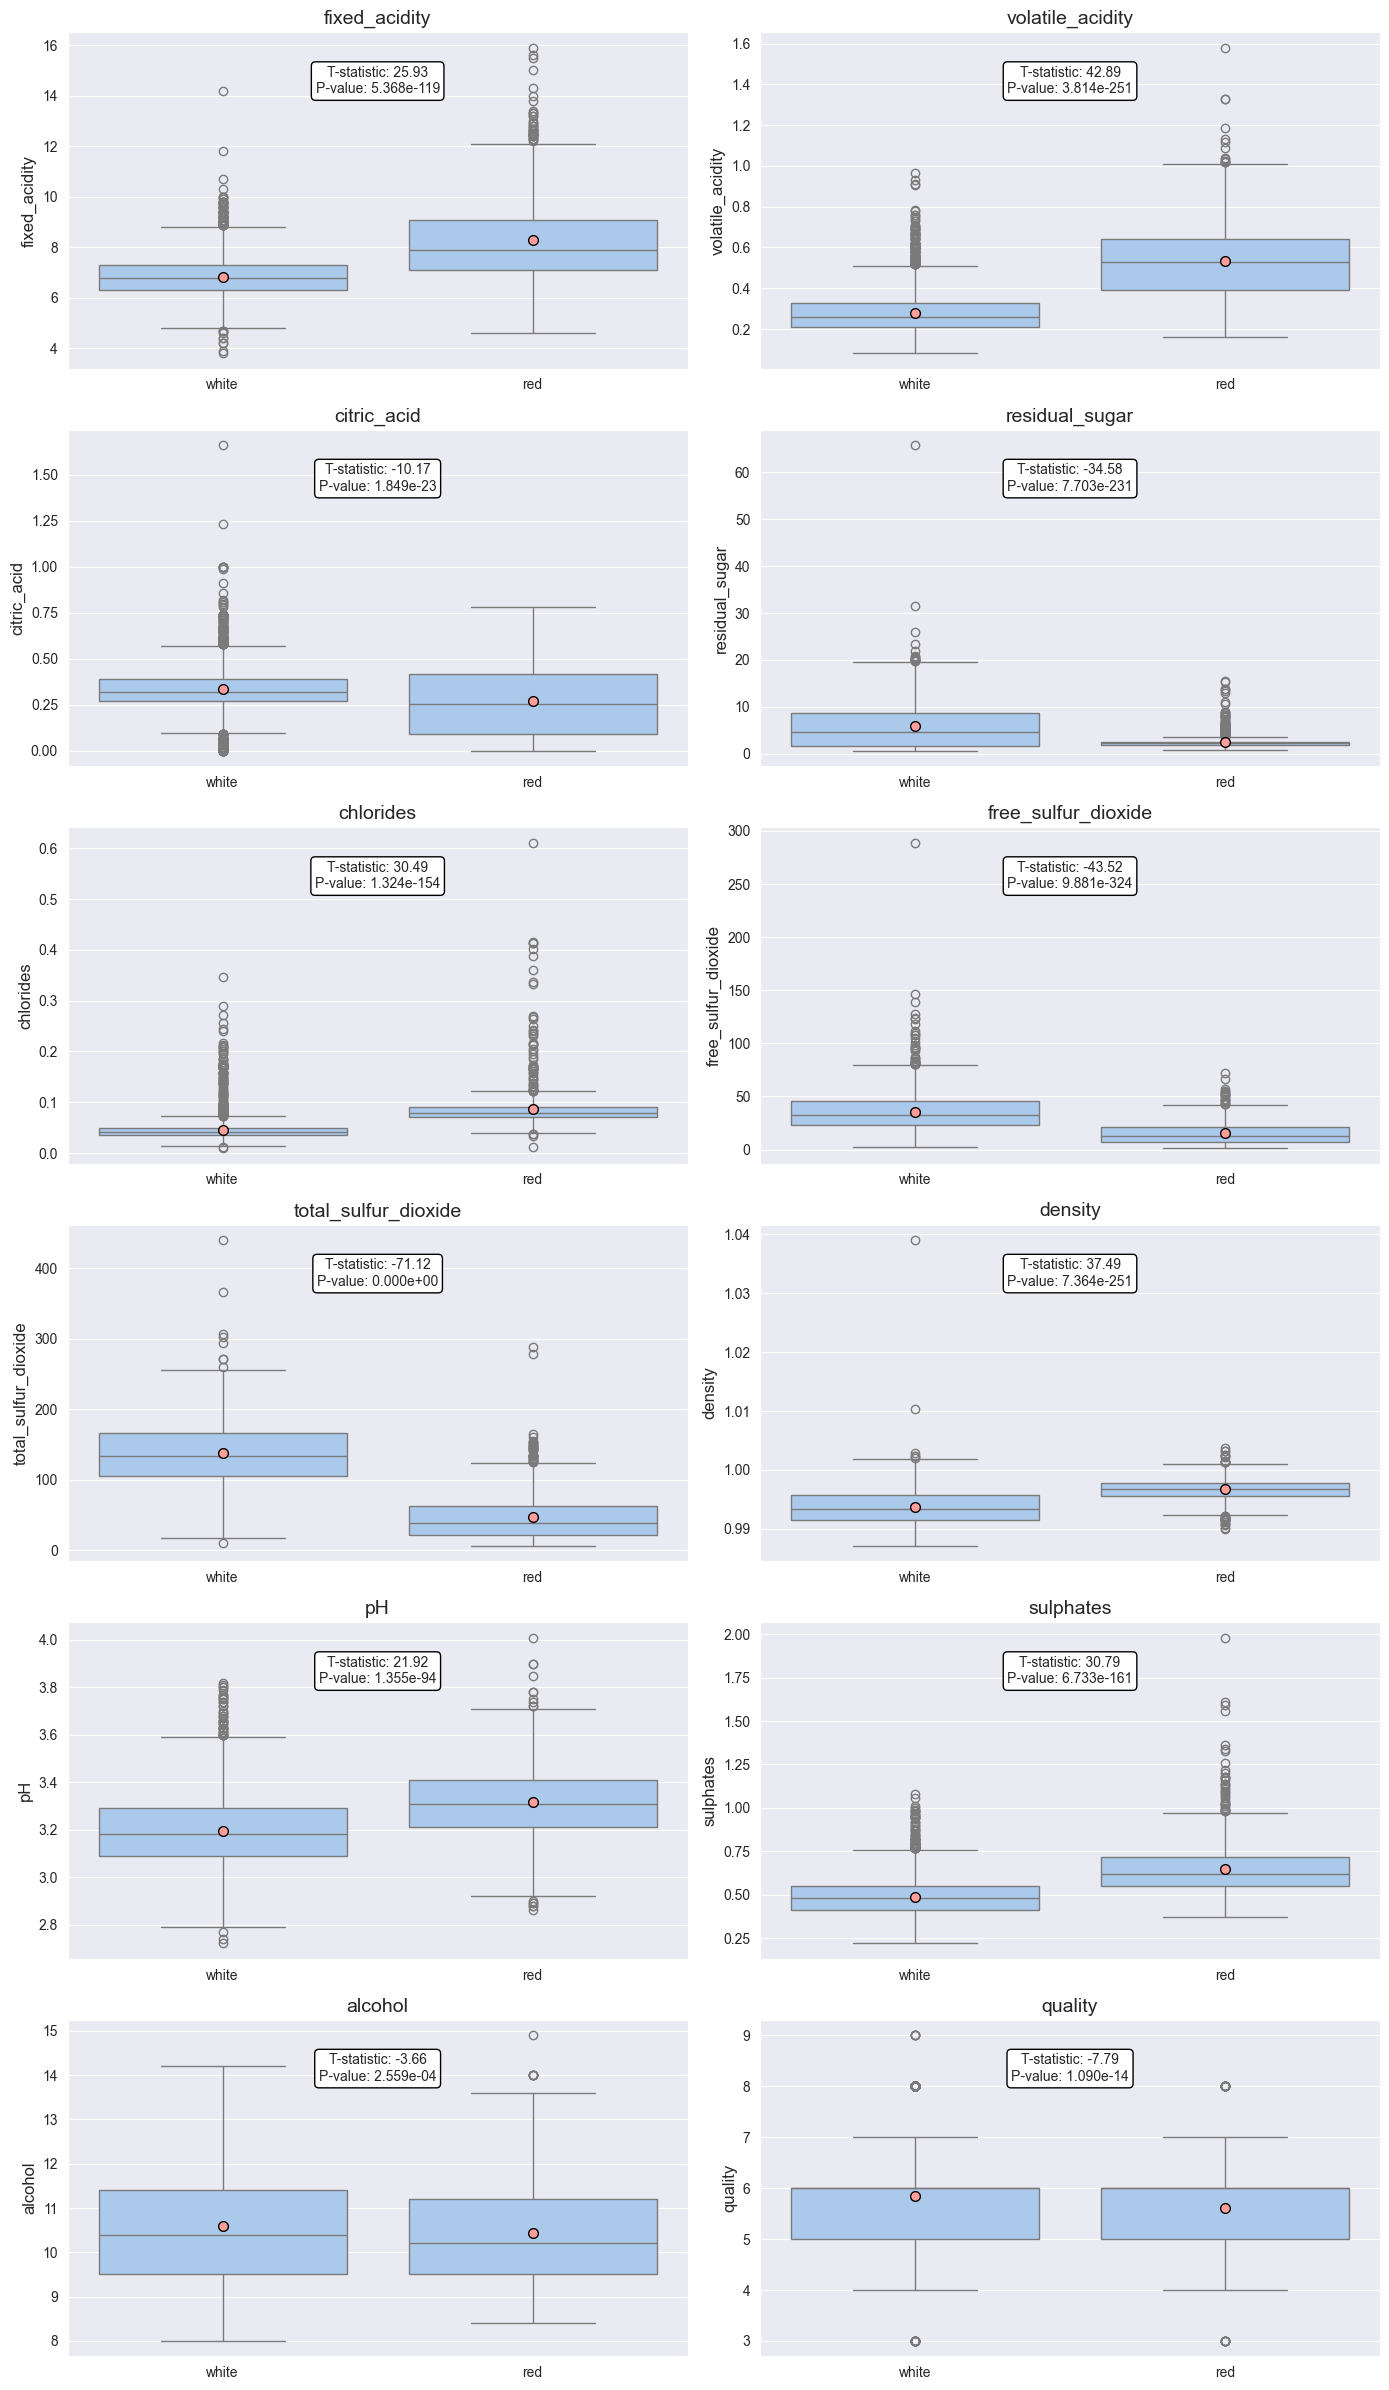

In [27]:
fig, axes = plt.subplots(nrows=(len(numerical_columns) + 1) // 2, ncols=2, figsize=(14, len(numerical_columns)*2))
axes = axes.flatten()  # Flatten to make it easier to iterate over axes

# Loop through the columns to plot each boxplot
for i, col in enumerate(numerical_columns):
    # Create the boxplot
    sns.boxplot(data=df_wine_clean, x='color', y=col, ax=axes[i], orient="v", showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": palette[3], "markeredgecolor": "black", "markersize": 7})
    
    # Perform the t-test for the two categories of wine (assuming 'color' is the column with wine types)
    group1 = df_wine_clean[df_wine_clean['color'] == 'red'][col]
    group2 = df_wine_clean[df_wine_clean['color'] == 'white'][col]
    
    t_stat, p_value = ttest_ind(group1, group2, equal_var = False, alternative = 'two-sided')
    
    # Add annotation with t-statistic and p-value
    axes[i].annotate(f"T-statistic: {t_stat:.2f}\nP-value: {p_value:.3e}", 
                     xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='top', 
                     fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', linewidth=1))

    # Set title and labels
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove empty subplots if the number of variables is odd
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- All metrics showed a significant difference between white and red wines, which is natural given that they use different grapes and processes.  
- We used the t-test for evaluation, considering variance differences (due to the wine color distinction) and a two-tailed test.  
- Color appears to be a distinguishing characteristic.  


## 3.2 Wine quality separability

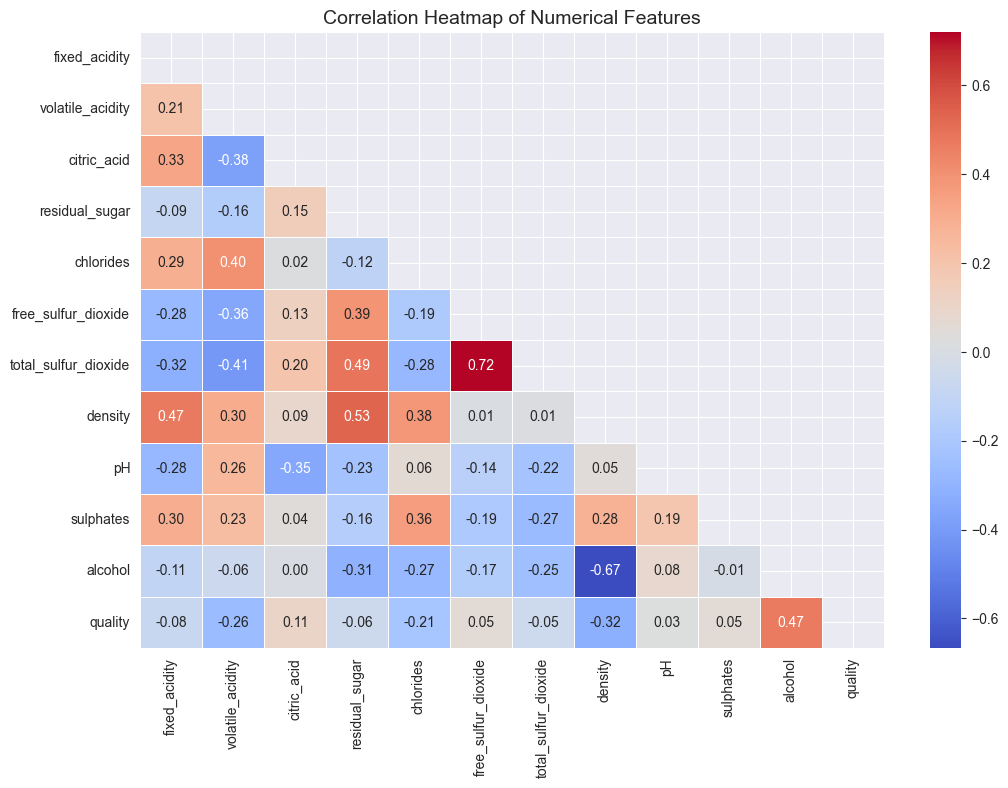

In [28]:
# Compute correlation matrix
corr_matrix = df_wine_clean[numerical_columns].corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    mask=mask,   # Apply mask
    annot=True,  # Show correlation values
    fmt=".2f",   # Two decimal places
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar=True
)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

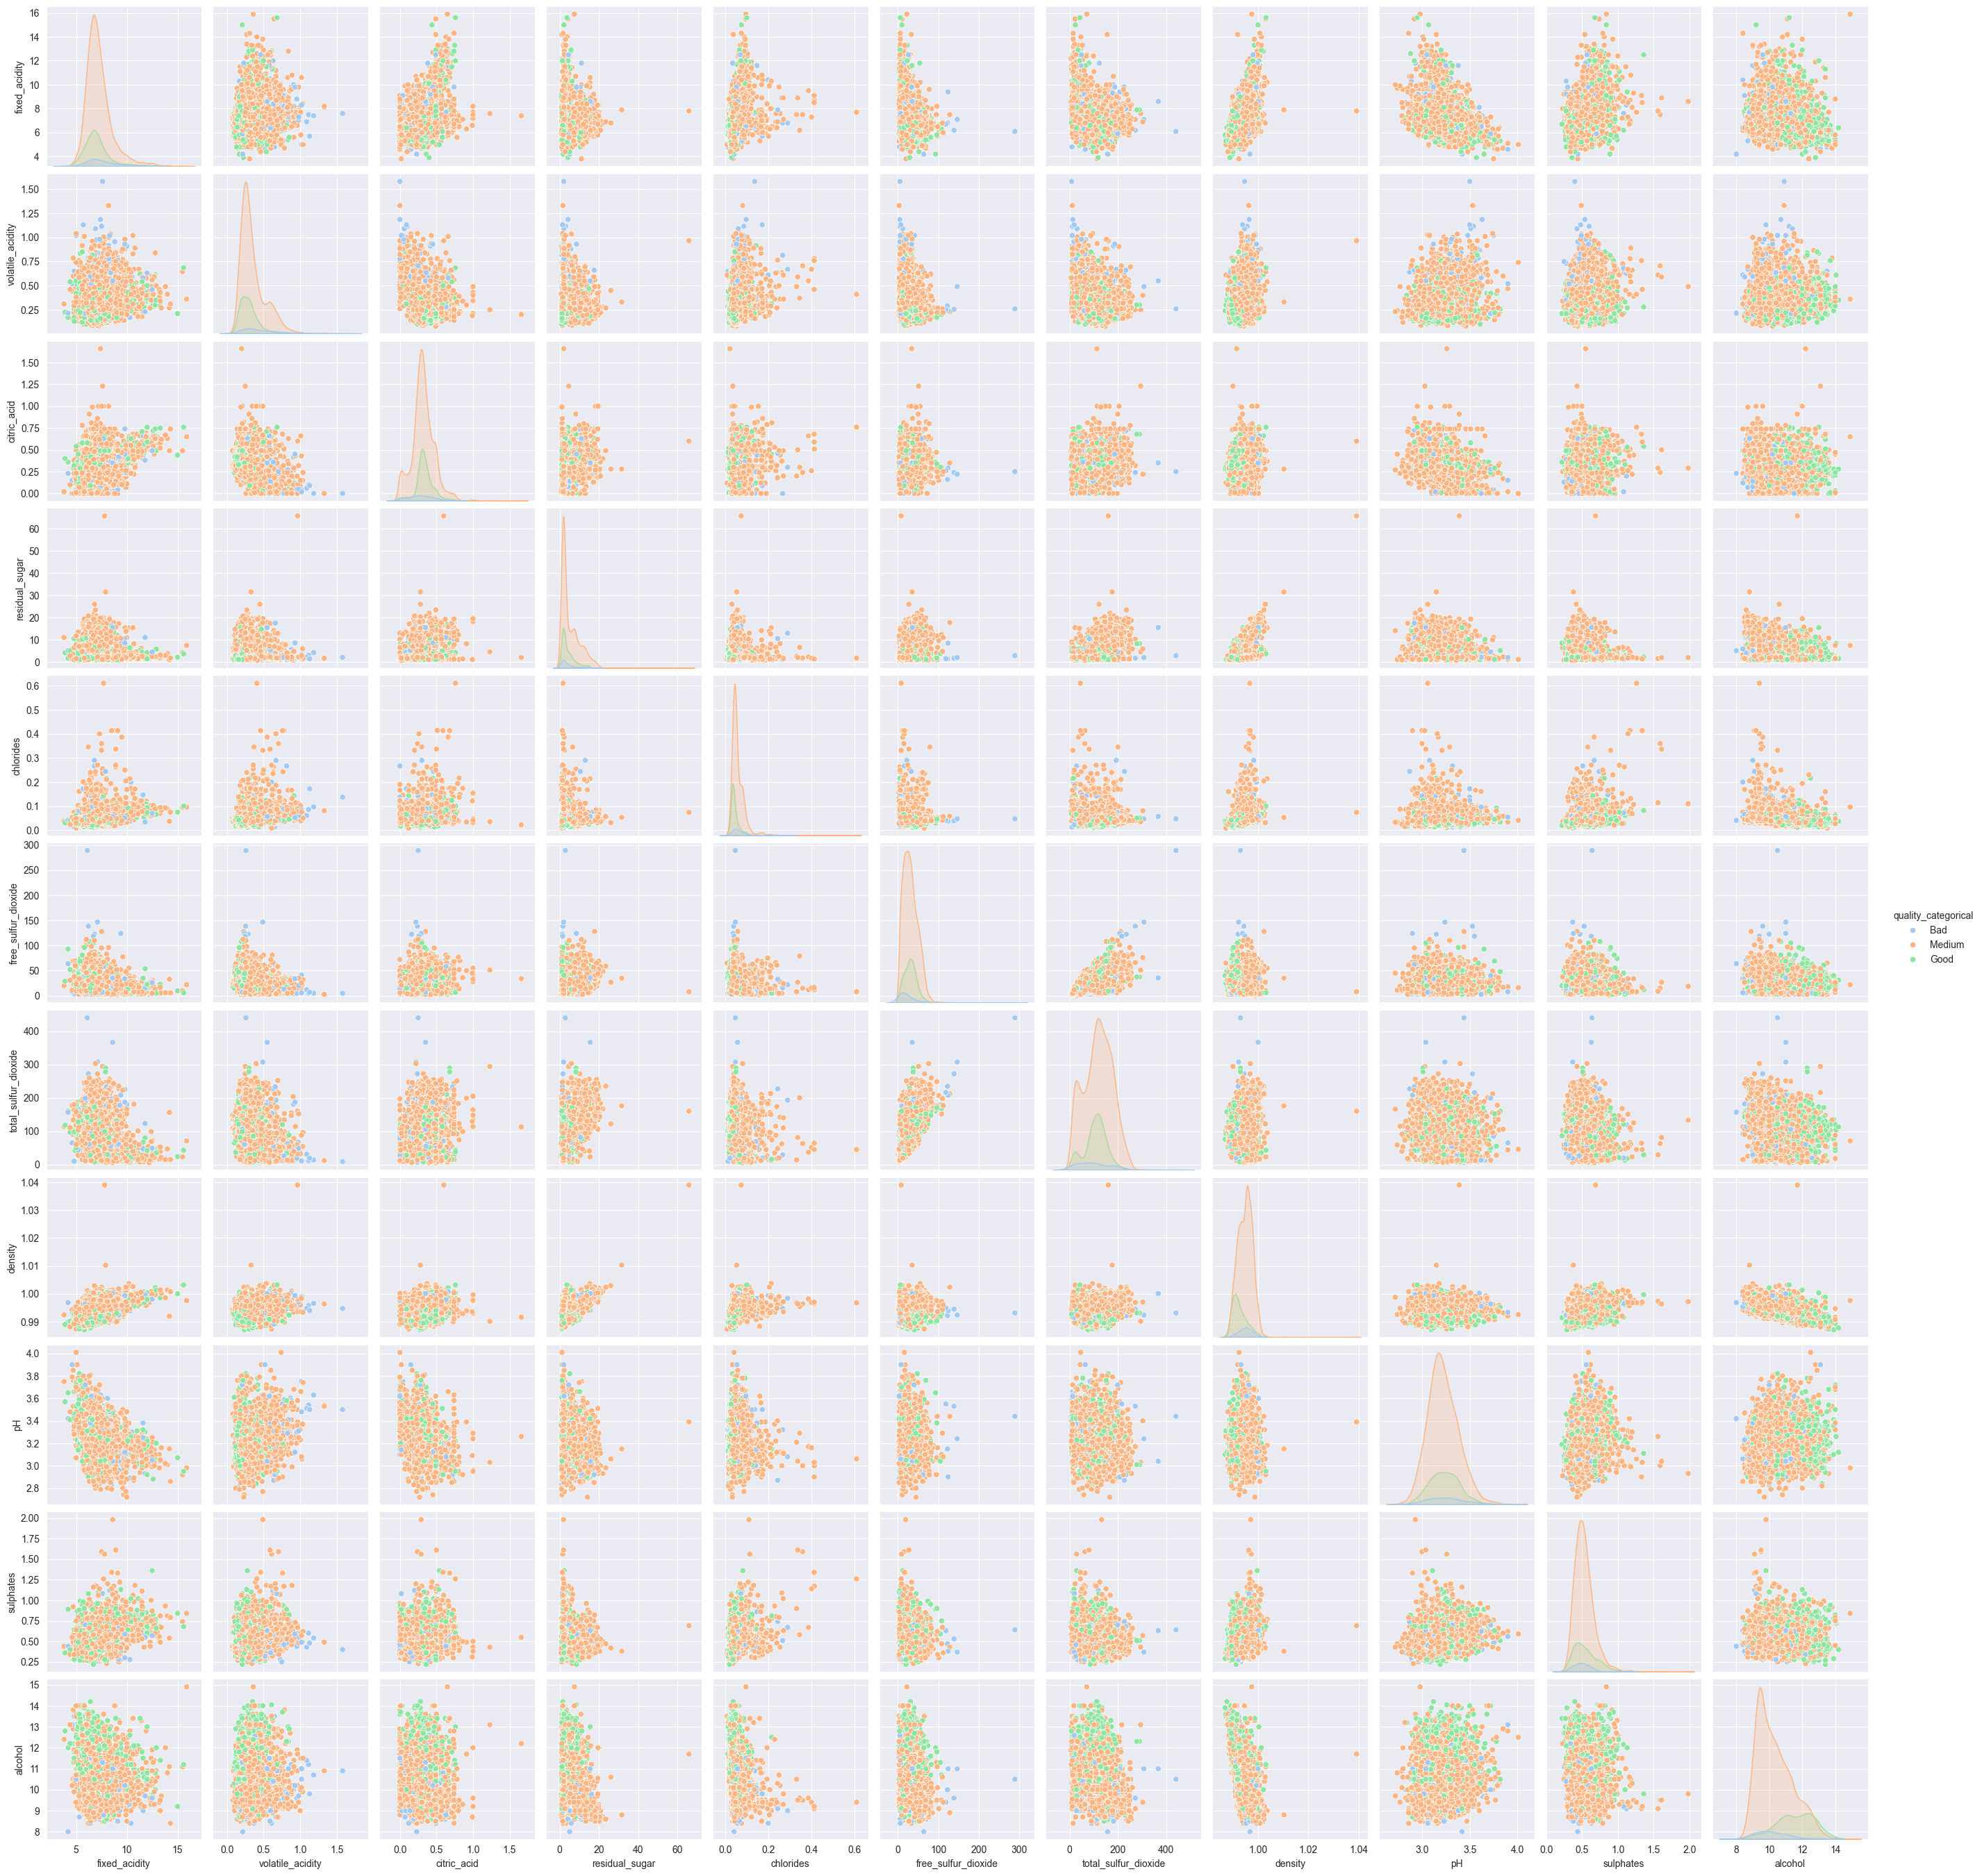

In [29]:
g = sns.pairplot(data=df_wine_clean.drop('quality', axis=1), hue='quality_categorical')

plt.show()

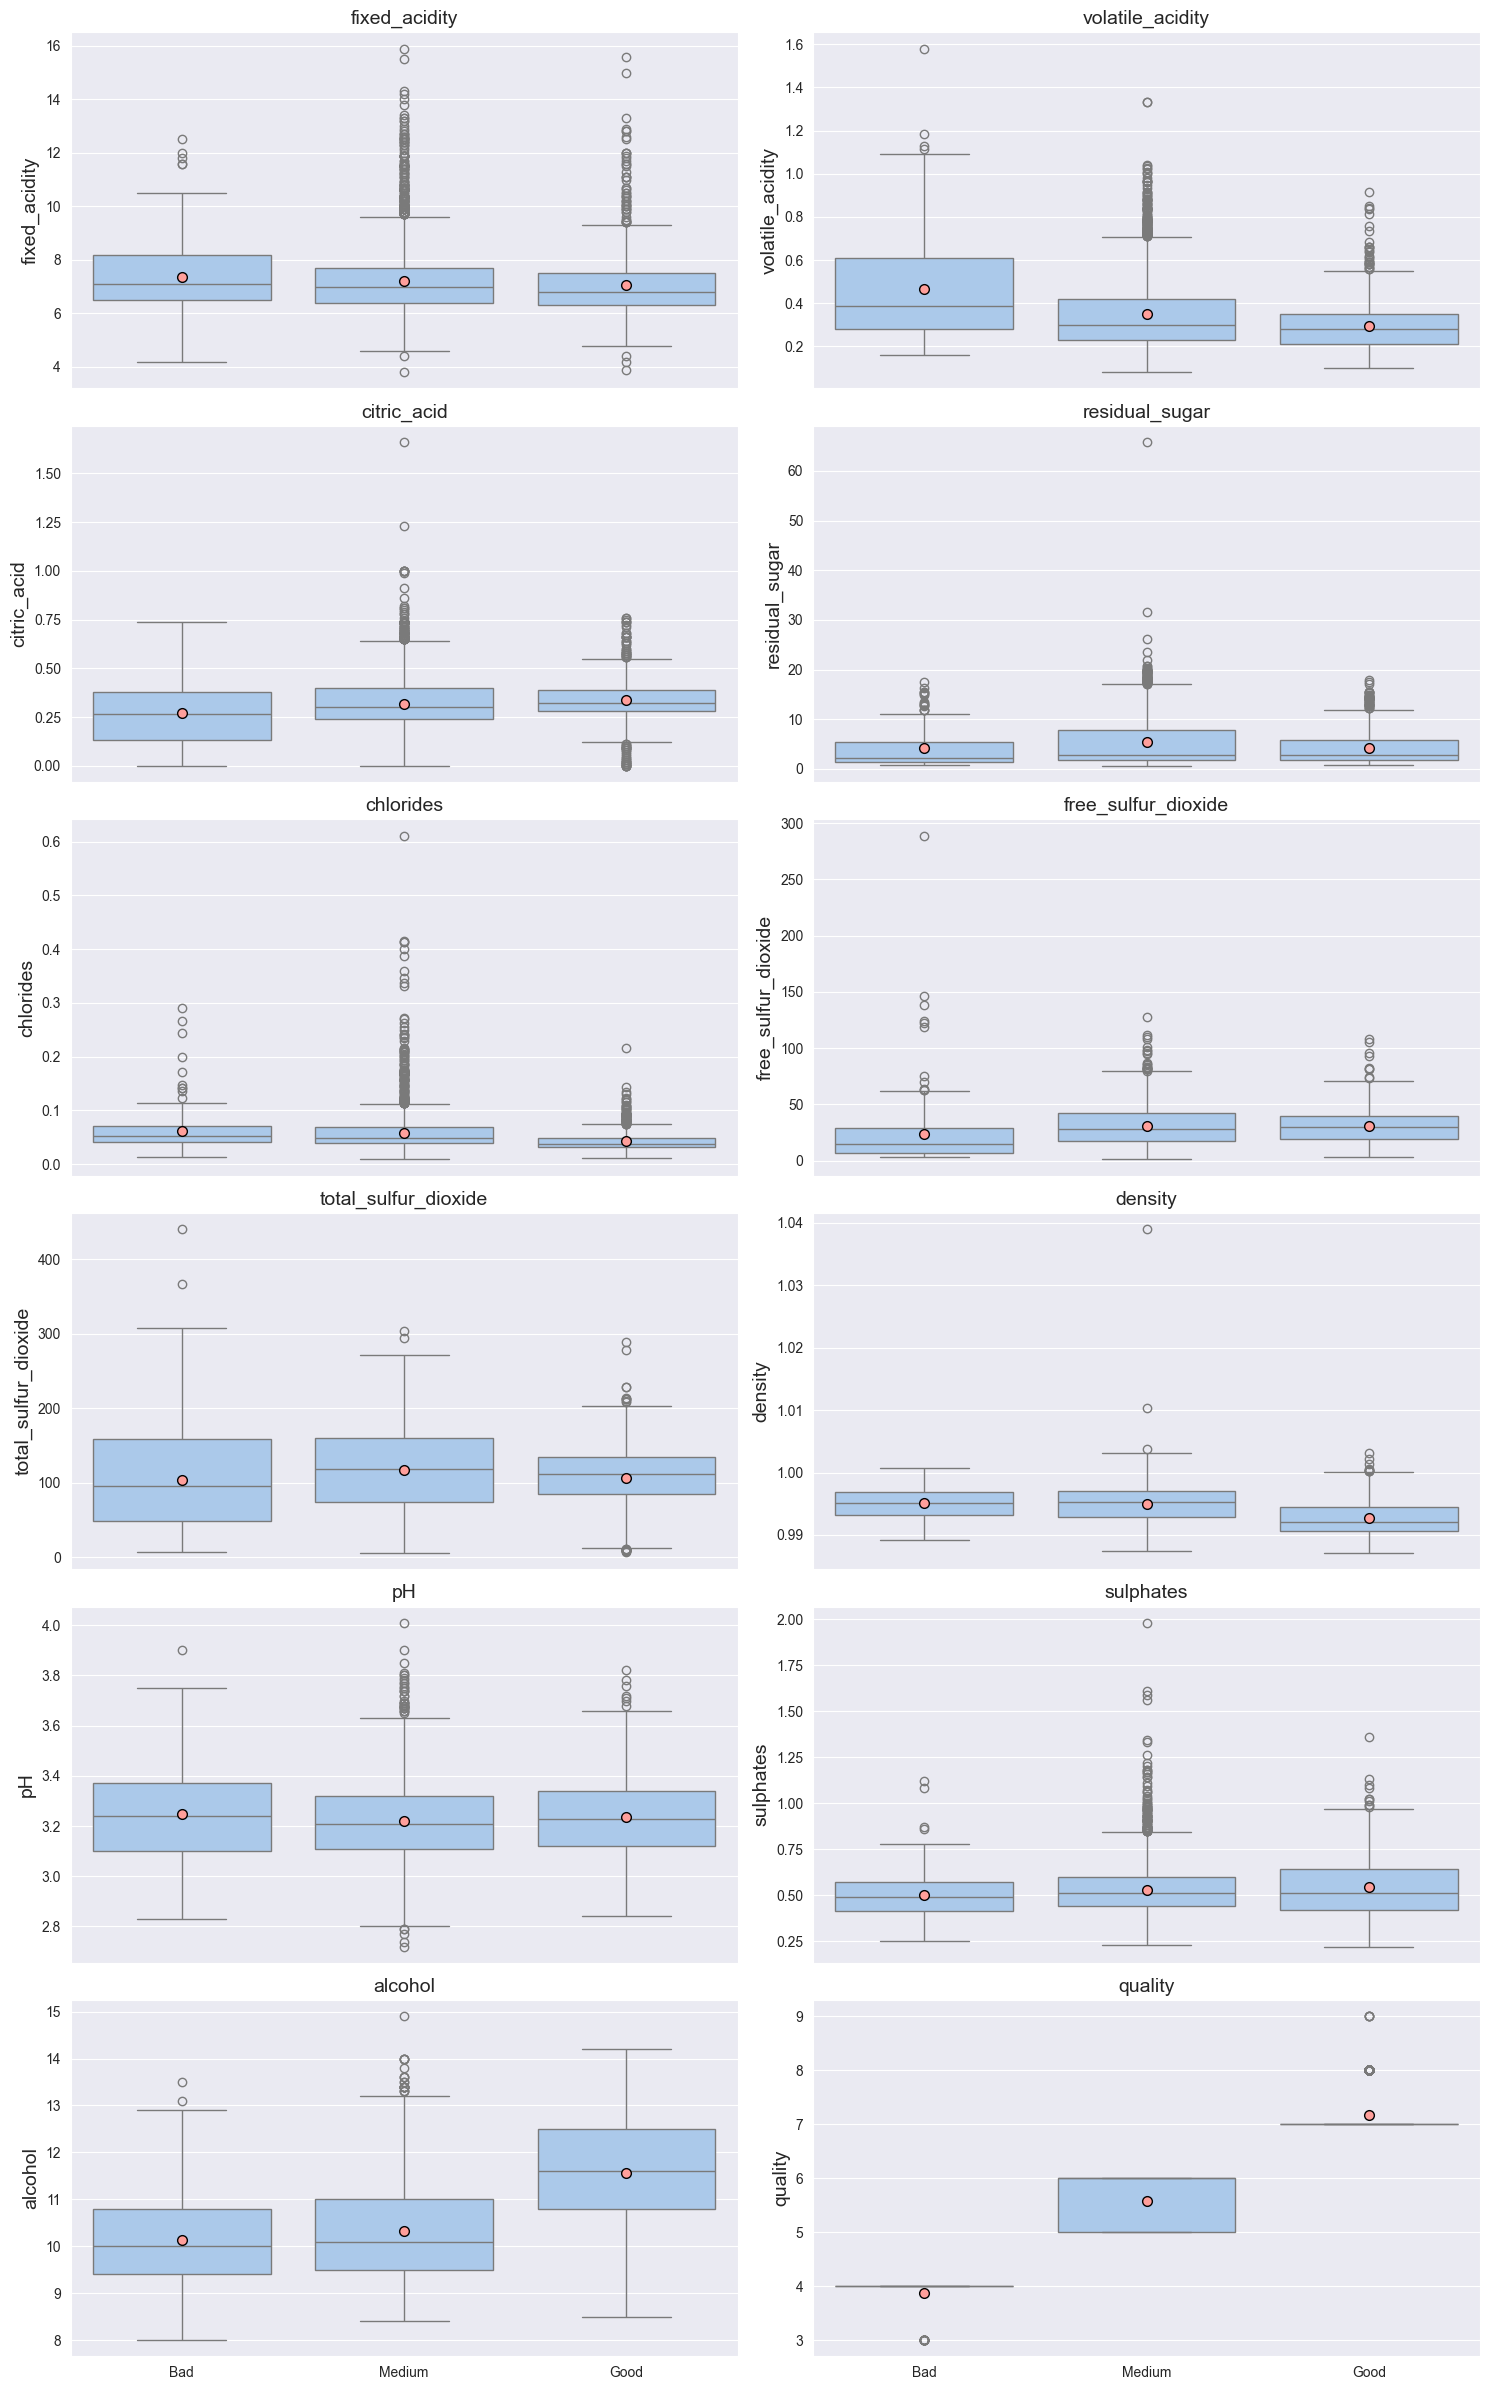

In [30]:
n_cols = 2
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), sharex=True)
axes = axes.flatten()  # Flatten for easier indexing

# Loop through numerical columns and plot each
for i, col in enumerate(numerical_columns):
    sns.boxplot(
        data=df_wine_clean, 
        y=col, 
        x="quality_categorical", 
        ax=axes[i], 
        orient="v",  # Vertical orientation
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": palette[3], "markeredgecolor": "black", "markersize": 7}
    )
    axes[i].set_title(f"{col}", fontsize=14)
    axes[i].set_ylabel(col, fontsize = 14)
    axes[i].set_xlabel("", fontsize = 14)
    

    # Apply global X-axis limits

# Hide empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Hypothesis Testing for Quality categorical effects using Kruskal-Wallis Test

Since the data is not normally distributed (from previous analysis), we'll use the **Kruskal-Wallis Test**, which is a non-parametric test that compares the medians of three or more independent groups. It does not assume a normal distribution and is appropriate for ordinal categorical variables like "Bad", "Medium", and "Good" in this case.

#### Formulation of Hypothesis:

Let’s consider the variable **X** as a numerical feature (e.g., alcohol content, pH, etc.) and **Y** as the ordinal categorical variable (with levels "Bad", "Medium", and "Good"). The hypothesis for this test are:

> $H_0: \mu_1 = \mu_2 = \mu_3$

> $H_1: \text{At least one of the medians is different}$

In [31]:
for col in numerical_columns:
    print(f"Testing column: {col}")
    
    # Group data by quality_categorical and collect the corresponding column values
    groups = [df_wine_clean[df_wine_clean['quality_categorical'] == quality][col] 
              for quality in df_wine_clean['quality_categorical'].unique()]
    
    # Perform Kruskal-Wallis Test
    stat, p_value = kruskal(*groups)
    
    # Print the result
    print(f"Kruskal-Wallis test statistic: {stat:.3e}")
    print(f"P-value: {p_value:.3e}")
    
    # Determine significance
    if p_value < 0.05:
        print("The difference is statistically significant.")
    else:
        print("No statistically significant difference.")
    print("-" * 50)

Testing column: fixed_acidity
Kruskal-Wallis test statistic: 2.292e+01
P-value: 1.055e-05
The difference is statistically significant.
--------------------------------------------------
Testing column: volatile_acidity
Kruskal-Wallis test statistic: 1.118e+02
P-value: 5.337e-25
The difference is statistically significant.
--------------------------------------------------
Testing column: citric_acid
Kruskal-Wallis test statistic: 4.358e+01
P-value: 3.440e-10
The difference is statistically significant.
--------------------------------------------------
Testing column: residual_sugar
Kruskal-Wallis test statistic: 2.479e+01
P-value: 4.130e-06
The difference is statistically significant.
--------------------------------------------------
Testing column: chlorides
Kruskal-Wallis test statistic: 2.710e+02
P-value: 1.388e-59
The difference is statistically significant.
--------------------------------------------------
Testing column: free_sulfur_dioxide
Kruskal-Wallis test statistic: 7.999

### Post-Hoc Test to Determine Which Groups Differ

After performing the Kruskal-Wallis test and finding significant differences in the medians across the groups, we proceed with a **Post-Hoc Test** to identify which specific pairs of groups are different. To achieve this, we use **Dunn's Test** with a **Bonferroni correction** to account for multiple comparisons.

#### Dunn's Test:

- Dunn's test is a non-parametric test that compares all pairs of groups. Since the Kruskal-Wallis test indicated significant differences, Dunn's test helps pinpoint which specific pairs of groups (e.g., "Bad" vs. "Medium", "Medium" vs. "Good", etc.) have statistically significant differences in their distributions.

#### Bonferroni Correction:

- As we are making multiple comparisons, a **Bonferroni correction** is applied to control for Type I errors. This is done by adjusting the significance level (0.05) based on the number of comparisons made.

In [32]:
def dunn_test(data, groups):
    """
    Perform Dunn's test for pairwise comparisons of groups
    with a Bonferroni correction for multiple testing.
    
    Args:
        data: List of arrays for each group (e.g., values for "Bad", "Medium", "Good")
        groups: List of group names (e.g., ['Bad', 'Medium', 'Good'])
    
    Returns:
        adjusted_p_values: List of tuples (group1, group2, adjusted p-value)
    """
    p_values = []
    # Loop over all unique pairs of groups
    for i, group1 in enumerate(groups):
        for j, group2 in enumerate(groups):
            if i < j:
                group1_data = np.array(data[i])
                group2_data = np.array(data[j])
                n1 = len(group1_data)
                n2 = len(group2_data)
                
                # Combine the data from both groups and compute ranks
                combined_data = np.concatenate([group1_data, group2_data])
                ranks = rankdata(combined_data)
                
                # Calculate average ranks for each group
                avg_rank1 = np.mean(ranks[:n1])
                avg_rank2 = np.mean(ranks[n1:])
                
                # Total number of observations in both groups
                N = n1 + n2
                # Standard error calculation
                SE = np.sqrt((N * (N + 1) / 12) * (1/n1 + 1/n2))
                
                # Compute the z-statistic
                z = (avg_rank1 - avg_rank2) / SE
                
                # Calculate the two-tailed p-value
                p_value = 2 * (1 - norm.cdf(np.abs(z)))
                p_values.append((groups[i], groups[j], p_value))
    
    # Apply Bonferroni correction
    n_tests = len(p_values)
    adjusted_p_values = [(g1, g2, min(p * n_tests, 1.0)) for g1, g2, p in p_values]
    return adjusted_p_values

In [33]:
for col in numerical_columns:
    print(f"Post-hoc pairwise comparisons for {col}:")
    
    # Group data by quality_categorical for the current column
    groups_data = [df_wine_clean[df_wine_clean['quality_categorical'] == quality][col].values 
                   for quality in ['Bad', 'Medium', 'Good']]
    
    # Perform Dunn's test
    results = dunn_test(groups_data, ['Bad', 'Medium', 'Good'])
    
    # Print results in scientific notation
    for group1, group2, p_value in results:
        print(f"Comparison: {group1} vs {group2}, p-value: {p_value:.3e}")
        if p_value < 0.05:
            print(f"  Significant difference between {group1} and {group2}")
        else:
            print(f"  No significant difference between {group1} and {group2}")
    print("-" * 50)

Post-hoc pairwise comparisons for fixed_acidity:
Comparison: Bad vs Medium, p-value: 2.824e-01
  No significant difference between Bad and Medium
Comparison: Bad vs Good, p-value: 1.466e-03
  Significant difference between Bad and Good
Comparison: Medium vs Good, p-value: 4.714e-05
  Significant difference between Medium and Good
--------------------------------------------------
Post-hoc pairwise comparisons for volatile_acidity:
Comparison: Bad vs Medium, p-value: 4.972e-12
  Significant difference between Bad and Medium
Comparison: Bad vs Good, p-value: 0.000e+00
  Significant difference between Bad and Good
Comparison: Medium vs Good, p-value: 2.751e-12
  Significant difference between Medium and Good
--------------------------------------------------
Post-hoc pairwise comparisons for citric_acid:
Comparison: Bad vs Medium, p-value: 5.436e-04
  Significant difference between Bad and Medium
Comparison: Bad vs Good, p-value: 7.899e-08
  Significant difference between Bad and Good
Com

## Section Highlights:

- The correlation values with the quality variable are low, suggesting that a linear regression model may not be the most suitable.
- The separation into 3 categories (Bad, Medium, Good) for the wines shows some distinction in the data, as seen in the pairwise scatterplots. However, it is important to note that the number of wines in the "Medium" category was much higher than in the other categories.
- A significant difference in the means of features across the 3 categories was observed through the Kruskal-Wallis test, with statistical significance at the 5% level.
- The variables pH and sulfates had the highest p-values (around 3%).
- The Dunn test, applied to each feature, indicated that in the majority of cases, there was a statistically significant difference between the 3 classes.
- All available features will be used for model development.

**Next steps:**
- Evaluate the impact of the 3 categories in a classification model versus a regression model.
- Analyze the impact of outliers on model performance.
- Train several models to compare their performances.
- Perform hyperparameter tuning on the models.
- Evaluate the final model on the test set.

In [34]:
# Save the data for modelling:
import os

# Define file paths
train_path = os.path.join('..', 'data', 'train.csv')
valid_path = os.path.join('..', 'data', 'validation.csv')
test_path = os.path.join('..', 'data', 'test.csv')

# Save the datasets as CSV files
pd.concat([X_train, y_train], axis = 1).to_csv(train_path, index=False)
pd.concat([X_valid, y_valid], axis = 1).to_csv(valid_path, index=False)
pd.concat([X_test, y_test], axis = 1).to_csv(test_path, index=False)